In [1]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image

In [2]:
IMAGE_ROOT = "../data/sartorius-cell-instance-segmentation"
ANN_PATH = "../inputs/annotations_train_f0.json"

In [3]:
image_root = Path(IMAGE_ROOT)
annotation = Path(ANN_PATH)
coco = COCO(annotation)
imgIds = coco.getImgIds()

loading annotations into memory...
Done (t=0.27s)
creating index...
index created!


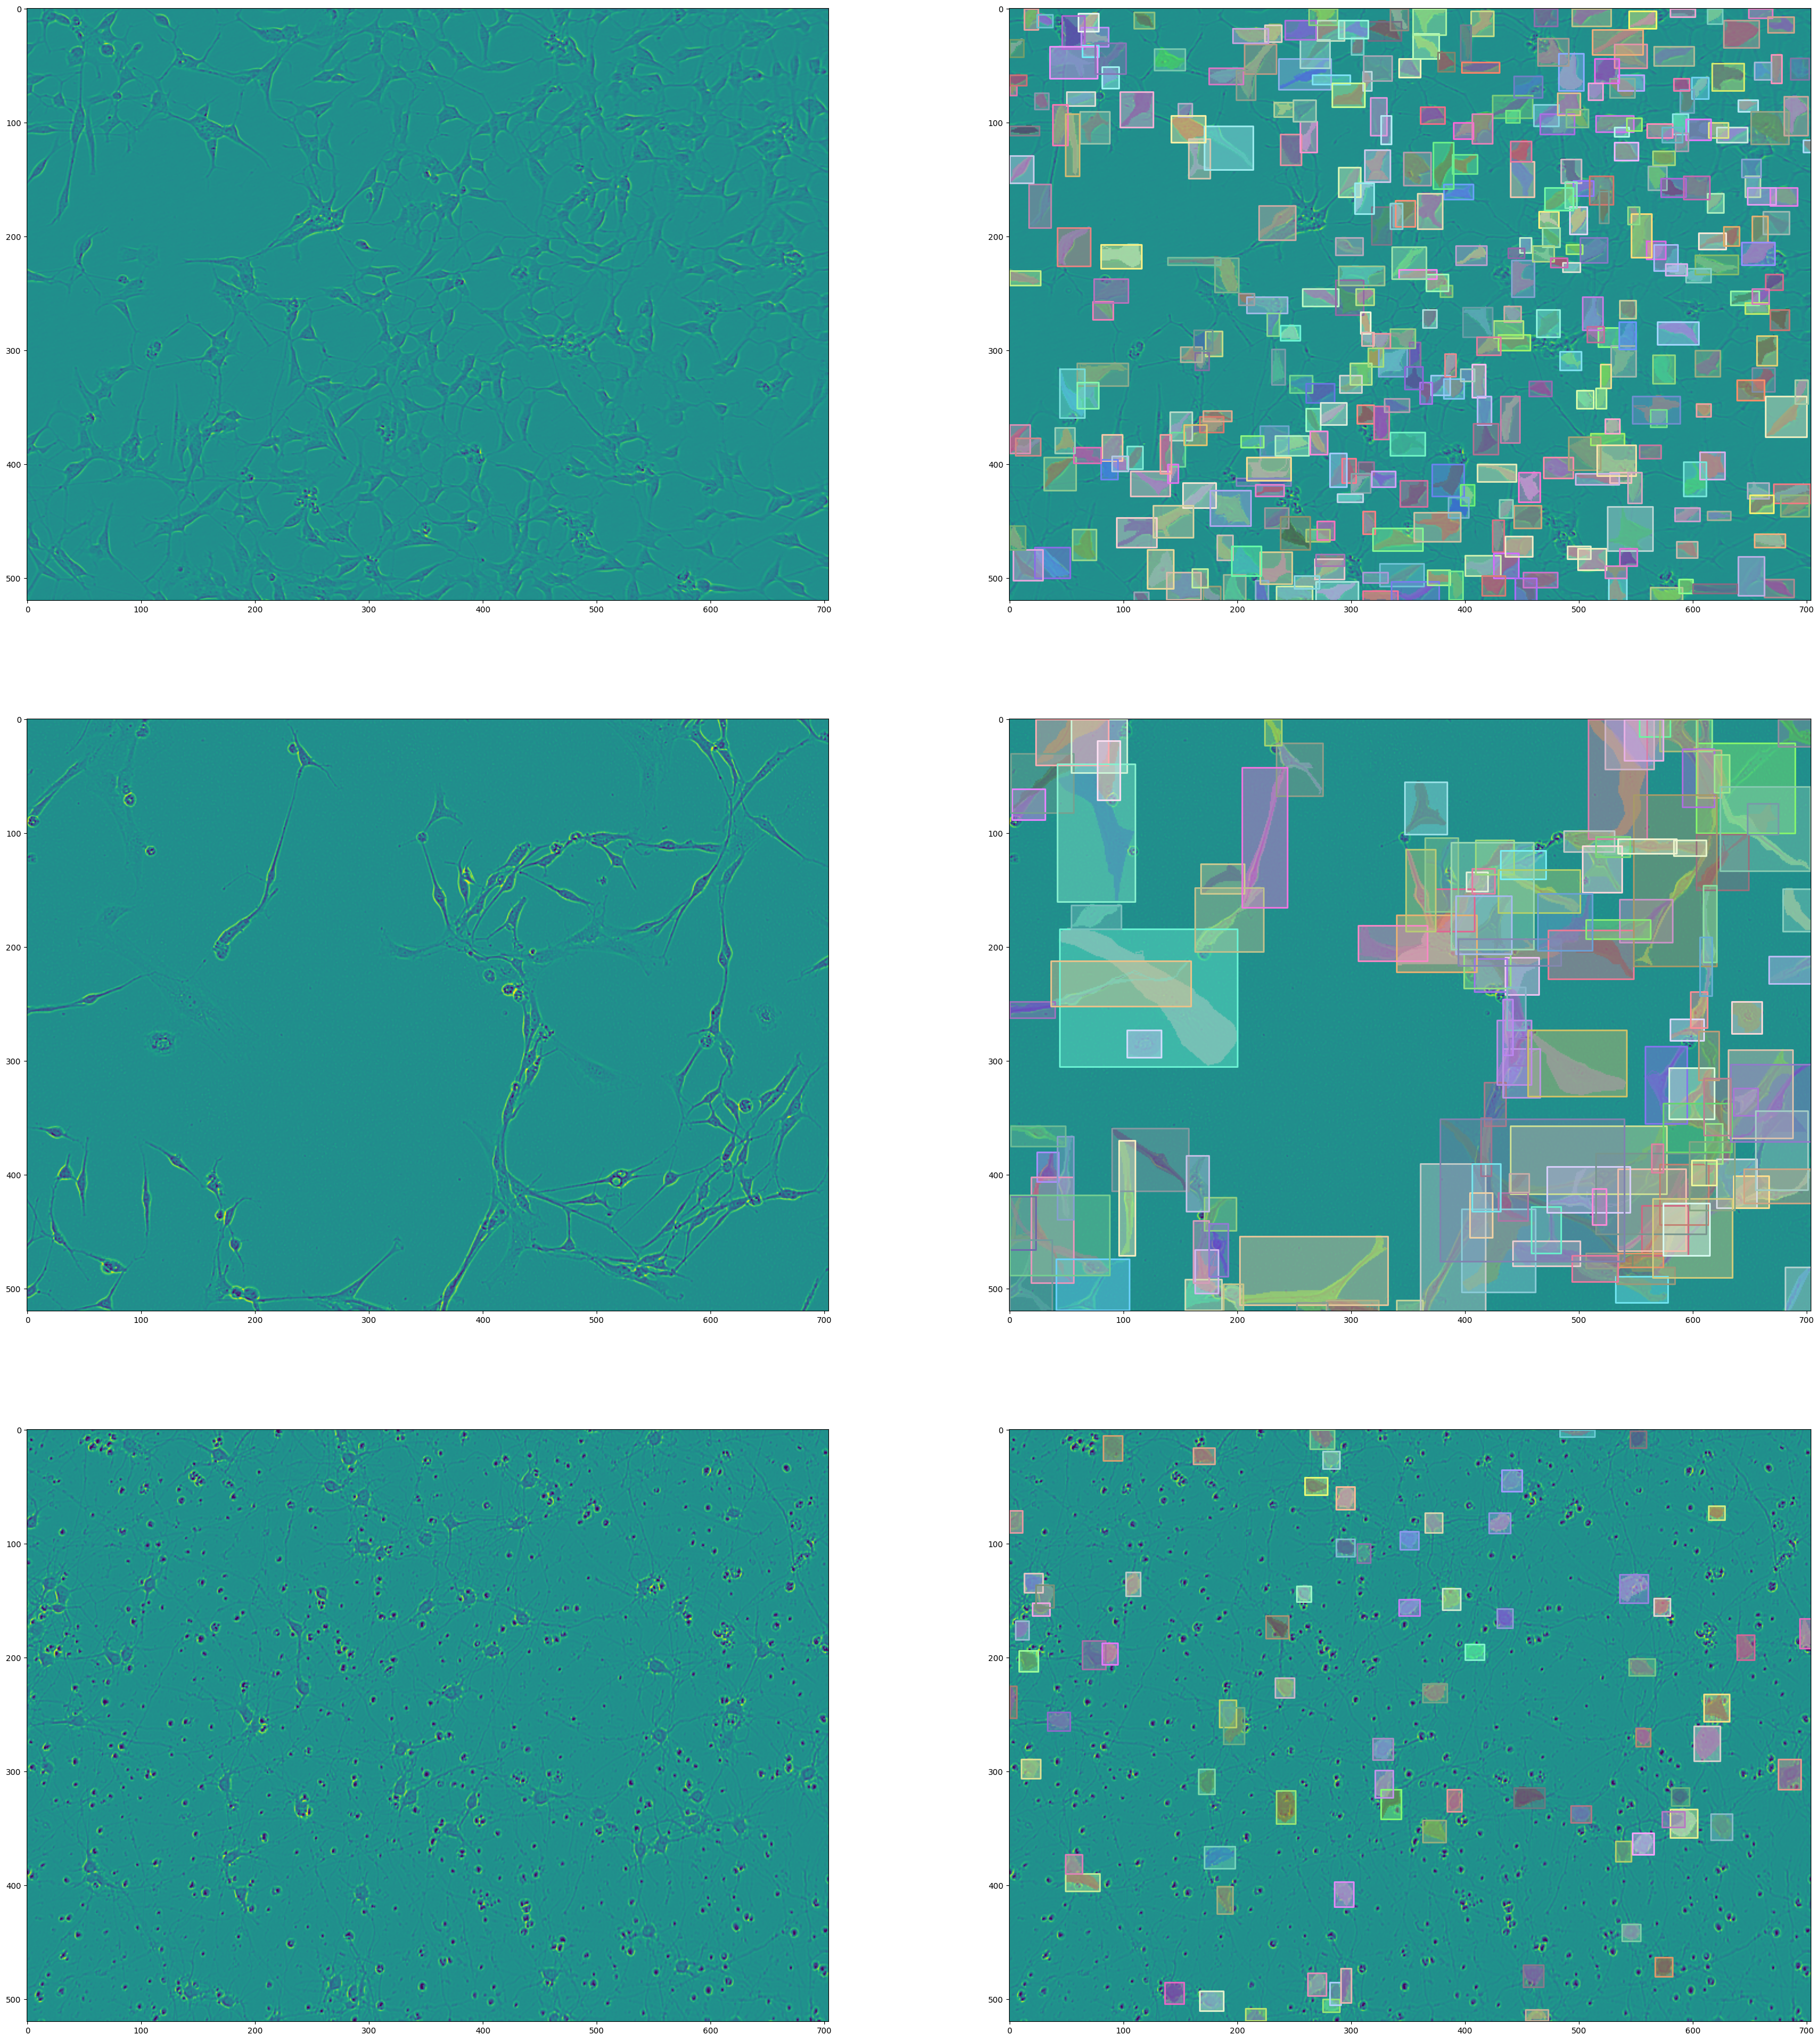

In [4]:
imgs = coco.loadImgs(imgIds[-3:])
_,axs = plt.subplots(len(imgs),2,figsize=(40,15 * len(imgs)))
for img, ax in zip(imgs, axs):
    I = Image.open(image_root / img['file_name'])
    annIds = coco.getAnnIds(imgIds=[img['id']])
    anns = coco.loadAnns(annIds)
    ax[0].imshow(I)
    ax[1].imshow(I)
    plt.sca(ax[1])
    coco.showAnns(anns, draw_bbox=True)